# Question 1:

<IPython.core.display.Javascript object>


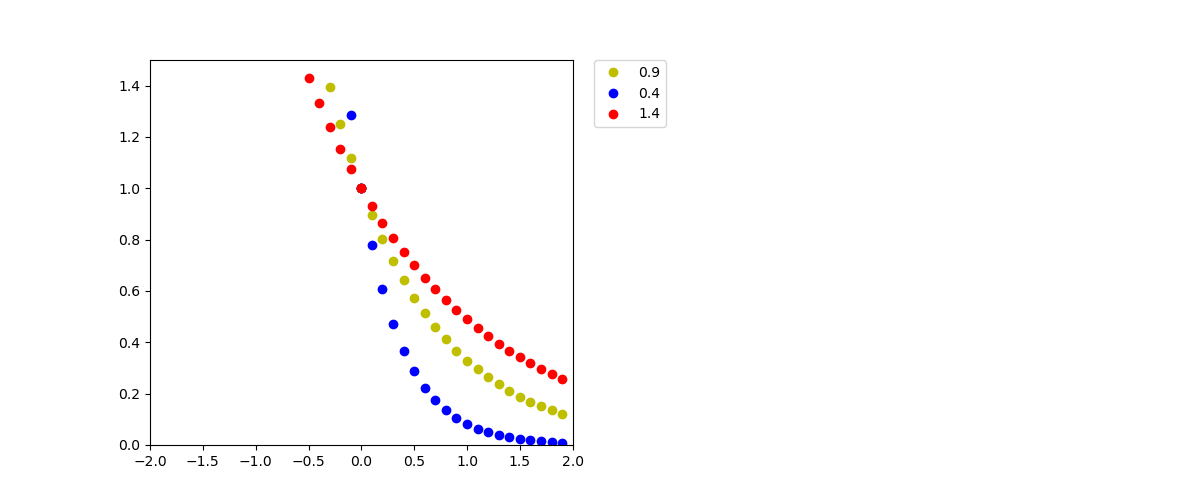

(0.0, 1.5)

In [1]:
# add imports here
import math
import random
import matplotlib.pyplot as plt
#special jupyter notebook command to make plots interactive
%matplotlib notebook

fig1 = plt.figure(figsize=(12,5))
ax= fig1.add_subplot(121)
ax.set_xlim([-2,2])
ax.set_ylim([0,1.5])

In [2]:
def plot_for_temp(temperature,color):
    beta=1/temperature
    ax.plot(0,1,color,label=temperature)
    for n in range(40):
        delta_U=n/10-2 
        p_acc = math.exp(-beta*delta_U)
        ax.plot(delta_U,p_acc,color)
        
plot_for_temp(0.9,'oy')
plot_for_temp(0.4,'ob')
plot_for_temp(1.4,'or')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


A change to a configuration of higher energy has a higher probability at higher temperatures than at lower temperatures. At lower temperatures, the probability to make a move drops much more rapidly.

# Question 2:

In [3]:
def generate_initial_configuration(n_particles, density):
    """
    Generates intitial system configurations from a  number of particles and box size
    
    Parameters
    ---------
    n_particles: int
        number of particles randomly generated into configuration
        
    density: float
        density of particles, defined as the number of particles in a volume
        
    Returns
    -------
    atomic_coordinates : list
        A two dimensional list containing atomic coordinates
        
    box_length:
        length of one side of box. Assumes cubic box.
    """
    atomic_coordinates=[]
    box_size=n_particles/density
    box_length=math.pow(box_size,1/3)
    for i in range(n_particles):
        particle_coordinate=[]
        for d in range(3):
            particle_dimension=random.uniform(-box_length/2,box_length/2)
            particle_coordinate.append(particle_dimension)
        atomic_coordinates.append(particle_coordinate)
    return atomic_coordinates, box_length

In [4]:
atomic_coordinates, box_length = generate_initial_configuration(800,0.8)
print (box_length)
print (atomic_coordinates[0])

9.999999999999998
[-0.962209039166515, 1.7646399340825134, 1.8832250620441577]


# Question 3:

In [5]:
def calculate_distance(coord1, coord2, box_length=None):
    """
    Calculate the distance between two points. When box_length is set, the minimum image convention is used to calculate the distance between the points.

    Parameters
    ----------
    coord1, coord2 : list
        The coordinates of the points, [x, y, z]
    
    box_length : float, optional
        The box length

    Returns
    -------
    distance : float
        The distance between the two points accounting for periodic boundaries
    """
    distance = 0
        
    for i in range(3):
        hold_dist = abs(coord2[i] - coord1[i])
    
        if (box_length):    
            if hold_dist > box_length/2:
                hold_dist = hold_dist - (box_length * round(hold_dist/box_length))
        distance += math.pow(hold_dist, 2)

    return math.sqrt(distance)

def calculate_rdf(atomic_coordinates, particle_index, n_interval, box_length):
    """
    Calculate the radial distribution function for the final coordinates 
    
    Parameters
    ---------
    atomic_coordinates : list
        A two dimensional list containing atomic coordinates
        
    particle_index: int
        index of particle in list to calculate rdf
    
    n_interval: int
        number of intervals measured
        
    box_length:
        length of one side of box. Assumes cubic box.
        
    Returns
    ---------
    rdf: float
        number of particles that are within a distance interval from a distance d from a particle
        
    """
#0. create a list of distances using atomic_coordinates    
    distances=[]
    for i in range(len(atomic_coordinates)):
        if i != particle_index:
            d=calculate_distance(atomic_coordinates[i],atomic_coordinates[particle_index], box_length)
            distances.append(d)
#1. consider each particle you have in turn. count all particles that are a distance between r + dr                
    histogram=[]
    for n in range(n_interval):
        histogram.append(0)   
    max_dist= box_length*math.sqrt(3)
    dr=max_dist/n_interval/2
    for r in distances:
        hist_lvl=math.floor(r/dr)
        histogram[hist_lvl]+= 1

    #while dr<max_dist:
     #   hit_counter=0
      #  for r in distances:
       #     if init_dist<r and r<=init_dist+dr:
        #        hit_counter += 1
        #histogram.append(hit_counter)
        #init_dist += dr         
#2. Divide your total count by N, the number of reference paritcles 
#3. Divide this number by 4 pi r^2 dr. This accounts for as r gets large, for trvial reason you find more paritcles with the given separation
#4. Divide this by the particle density. 
    rdf=[]
    n_particles=len(distances)
    for n in histogram:
        norm_avg=n/(n_particles*4*math.pi*((i*dr)**2)*dr*n_particles/(box_length**3))
        rdf.append(norm_avg)
    return rdf,dr
rdf1,dr= calculate_rdf(atomic_coordinates, 3, 50, box_length)
print(rdf1)

[0.0, 0.0, 0.0, 3.757691623239355e-08, 3.757691623239355e-08, 0.0, 1.503076649295742e-07, 1.1273074869718065e-07, 1.8788458116196774e-07, 7.51538324647871e-08, 2.6303841362675485e-07, 2.254614973943613e-07, 2.6303841362675485e-07, 4.1334607855632906e-07, 4.1334607855632906e-07, 5.260768272535097e-07, 5.260768272535097e-07, 6.388075759506904e-07, 8.266921571126581e-07, 6.388075759506904e-07, 6.763844921830839e-07, 9.018459895774452e-07, 1.2776151519013808e-06, 1.1648844032042e-06, 1.089730570739413e-06, 1.089730570739413e-06, 1.5406535655281356e-06, 1.2400382356689871e-06, 1.6909612304577097e-06, 1.4654997330633485e-06, 1.3527689843661678e-06, 1.3151920681337742e-06, 1.5782304817605292e-06, 1.2776151519013808e-06, 1.3151920681337742e-06, 1.0145767382746258e-06, 9.769998220422323e-07, 8.266921571126581e-07, 7.139614084154774e-07, 7.139614084154774e-07, 5.636537434859032e-07, 3.006153298591484e-07, 2.254614973943613e-07, 1.8788458116196774e-07, 7.51538324647871e-08, 3.757691623239355e-08,

<IPython.core.display.Javascript object>


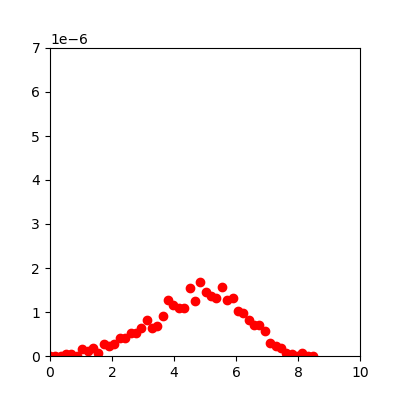

(0.0, 7e-06)

In [6]:
fig2 = plt.figure(figsize=(4,4))
rdf= fig2.add_subplot(111)
rdf.set_xlim([0,box_length])
rdf.set_ylim([0,0.000007])

In [7]:
for i in range(len(rdf1)):
    rdf.plot(i*dr,rdf1[i], 'or')

In [8]:
# Energy functions
def calculate_LJ(r_ij):
    """
    The LJ interaction energy between two particles.

    Computes the pairwise Lennard Jones interaction energy based on the separation distance in reduced units.

    Parameters
    ----------
    r_ij : float
        The distance between the particles in reduced units.
    
    Returns
    -------
    pairwise_energy : float
        The pairwise Lennard Jones interaction energy in reduced units.

    Examples
    --------
    >>> calculate_LJ(1)
    0

    """
    
    r6_term = math.pow(1/r_ij, 6)
    r12_term = math.pow(r6_term, 2)
    
    pairwise_energy = 4 * (r12_term - r6_term)
    
    return pairwise_energy

def calculate_total_energy(coordinates, box_length, cutoff):
    """
    Calculate the total energy of a set of particles using the Lennard Jones potential.
    
    Parameters
    ----------
    coordinates : list
        A nested list containing the x, y,z coordinate for each particle
    box_length : float
        The length of the box. Assumes cubic box.
    cutoff : float
        The cutoff length
    
    Returns
    -------
    total_energy : float
        The total energy of the set of coordinates.
    """
    
    total_energy = 0
    num_atoms = len(coordinates)

    for i in range(num_atoms):
        for j in range(i+1, num_atoms):
            # Calculate the distance between the particles - exercise.
            dist_ij = calculate_distance(coordinates[i], coordinates[j], box_length)

            if dist_ij < cutoff:
                # Calculate the pairwise LJ energy
                LJ_ij = calculate_LJ(dist_ij)

                # Add to total energy.
                total_energy += LJ_ij
    return total_energy

def calculate_tail_correction(num_particles, box_length, cutoff):
    """
    The tail correction associated with using a cutoff radius.
    
    Computes the tail correction based on a cutoff radius used in the LJ energy calculation in reduced units.
    
    Parameters
    ----------
    num_particles : int
        The number of particles in the system.
    
    box_length : int
        Size of the box length of the system, used to calculate volume.
    
    cutoff : int
        Cutoff distance.
    
    Returns
    -------
    tail_correction : float
        The tail correction associated with using the cutoff.
    """
    
    brackets = (1/3*math.pow(1/cutoff,9)) - math.pow(1/cutoff,3)
    volume = box_length**3
    
    constant = ((8*math.pi*(num_particles**2))/(3*volume))
    
    tail_correction = constant * brackets
    
    return tail_correction

def calculate_pair_energy(coordinates, i_particle, box_length, cutoff):
    """
    Calculate the interaction energy of a particle with its environment (all other particles in the system)
    
    Parameters
    ----------
    coordinates : list
        The coordinates for all the particles in the system.
        
    i_particle : int
        The particle number for which to calculate the energy.
        
    cutoff : float
        The simulation cutoff. Beyond this distance, interactions are not calculated.
    
    box_length : float
        The length of the box for periodic bounds
        
    Returns
    -------
    e_total : float
        The pairwise interaction energy of the ith particles with all other particles in the system
    """
    
    e_total = 0.0
    #creates a list of the coordinates for the i_particle
    i_position = coordinates[i_particle]
    
    num_atoms = len(coordinates)
    
    for j_particle in range(num_atoms):
        
        if i_particle != j_particle:
            #creates a list of coordinates for the j_particle
            j_position = coordinates[j_particle]
            rij = calculate_distance(i_position, j_position, box_length)
            
            if rij < cutoff:
                e_pair = calculate_LJ(rij)
                e_total += e_pair
    
    return e_total
    

def accept_or_reject(delta_U, beta):
    """
    Accept or reject a move based on the Metropolis criterion.
    
    Parameters
    ----------
    detlta_U : float
        The change in energy for moving system from state m to n.
    beta : float
        1/temperature
    
    Returns
    -------
    boolean
        Whether the move is accepted.
    """
    if delta_U <= 0.0:
        accept = True
    else:
        #Generate a random number on (0,1)
        random_number = random.random()
        p_acc = math.exp(-beta*delta_U)
        
        if random_number < p_acc:
            accept = True
        else:
            accept = False
    return accept 


In [9]:
def run_MC_RDF(num_particles,density,num_steps=5000,freq=1000,reduced_temperature=0.9):
    # Read or generate initial coordinates
    coord_init, box_length = generate_initial_configuration(num_particles,density)
    coord_change=coord_init[:]
    max_displacement = 0.1
    cutoff=3

    # Calculated quantities
    beta = 1 / reduced_temperature
    
    # Calculate and plot rdf for initial

    fig3 = plt.figure(figsize=(4,4))
    reduced_temperature= fig3.add_subplot(111)
    reduced_temperature.set_xlim([0,box_length])

    index_particle = random.randrange(num_particles)
    rdf_init,dr=calculate_rdf(coord_init, index_particle, 50, box_length)
    for i in range(len(rdf_init)):
        reduced_temperature.plot(i*dr,rdf_init[i], 'or')

    # Calculated Values

    total_energy = calculate_total_energy(coord_change, box_length, cutoff)
    total_correction = calculate_tail_correction(num_particles, box_length, cutoff)
    total_energy += total_correction


    for step in range(num_steps):
        # 1. Randomly pick one of the particles.
        random_particle = random.randrange(num_particles)

        # 2. Calculate the interaction energy of the selected particle with the system.
        current_energy = calculate_pair_energy(coord_change, random_particle, box_length, cutoff)

        # 3. Generate a random x, y, z displacement.
        x_rand = random.uniform(-max_displacement, max_displacement)
        y_rand = random.uniform(-max_displacement, max_displacement)
        z_rand = random.uniform(-max_displacement, max_displacement)

        # 4. Modify the coordinate of Nth particle by generated displacements.
        coord_change[random_particle][0] += x_rand
        coord_change[random_particle][1] += y_rand
        coord_change[random_particle][2] += z_rand

        # 5. Calculate the interaction energy of the moved particle with the system and store this value.
        proposed_energy = calculate_pair_energy(coord_change, random_particle, box_length, cutoff)
        delta_energy = proposed_energy - current_energy

        # 6. Calculate if we accept the move based on energy difference.
        accept = accept_or_reject(delta_energy, beta)

        # 7. If accepted, move the particle.
        if accept:
            total_energy += delta_energy
        else:
            #Move not accepted, roll back coordinates
            coord_change[random_particle][0] -= x_rand
            coord_change[random_particle][1] -= y_rand
            coord_change[random_particle][2] -= z_rand

        # 8. Print the energy if step is a multiple of freq.
        if step % freq == 0:
            print(step, total_energy/num_particles)

    rdf_fin, dr=calculate_rdf(coord_change, index_particle, 50, box_length)
    for i in range(len(rdf_fin)):
        reduced_temperature.plot(i*dr,rdf_fin[i], 'ob')


<IPython.core.display.Javascript object>


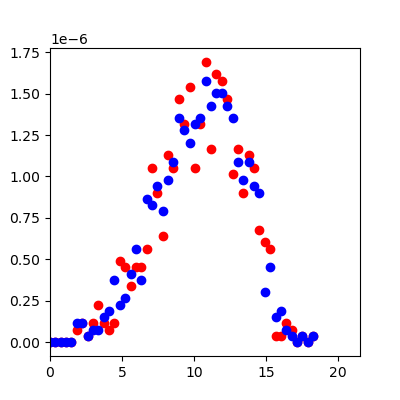

0 1056161.131359734
5000 54078.795197413296
10000 0.1638643070675193
15000 -0.610777605969349
20000 -0.6280146278587753
25000 -0.6251011651478268
30000 -0.6320443491211741
35000 -0.6583696929747355
40000 -0.6643686586160199
45000 -0.6484498845173452


In [10]:
run_MC_RDF(800,0.08,50000,5000)

<IPython.core.display.Javascript object>


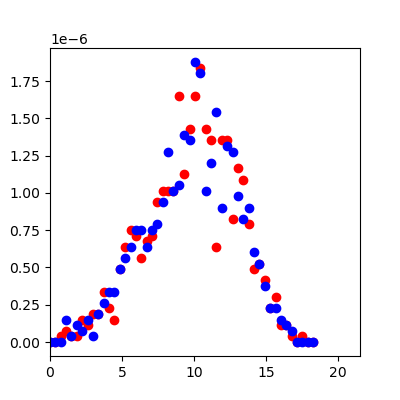

0 8580870.179971296
5000 470.068005653799
10000 -0.1344543904931143
15000 -0.6796236788337008
20000 -0.7194693380356574
25000 -0.7556397947599777
30000 -0.7741392021319341
35000 -0.7936450641907298
40000 -0.8229702277993958
45000 -0.8297616594322449


In [11]:
run_MC_RDF(800,0.08,50000,5000,0.3)

It is interesting to note that over 50000 steps of a Monte Carlo Simulation loop, we observe a change in the total energy, but the radial distribution function remains relatively unchanged from start to the end of simulation. This observation is noticed across different temperatures.